Name: Jose Aries E. De Los Santos

Training a Simple Neural Network with One Hidden layer and performance test with some chosen Optimizers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Import MNIST Data from google drive

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Math 288/Minipaper/'
X_train = np.loadtxt(file_path + 'train_X.csv', delimiter=',').T
Y_train = np.loadtxt(file_path + 'train_label.csv', delimiter=',').T

X_test = np.loadtxt(file_path + 'test_X.csv', delimiter=',').T
Y_test = np.loadtxt(file_path + 'test_label.csv', delimiter=',').T

In [ ]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


In [ ]:
df1 = pd.read_csv(file_path + 'train_label.csv')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Activation Functions and their Derivatives

In [ ]:
##Activation Functions
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

##Derivatives of Activation Functions
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

# Initialize Parameters

In [ ]:
##Initialize Parameters
def initialize_parameters(ninputs, nneurons, ytarget):
    ##initialize the weights
    w1 = np.random.randn(nneurons, ninputs)*0.001
    w2 = np.random.randn(ytarget, nneurons)*0.001

    ##initialize the bias
    b1 = np.zeros((nneurons, 1))
    b2 = np.zeros((ytarget, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

# Forward Propagation Process

In [ ]:
##Forward Propagation Process
def for_prop(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_dictionary = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_dictionary

# Cost Function: Cross Entropy Function for Multiclassification

In [ ]:
##Define the Cost Function
def cost_function(a2, y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

# Backpropagation Process

In [ ]:
##This will be used for accuracy

def accuracy(inputs, ytrue, parameters):

    forward = for_prop(inputs, parameters)
    ypred = forward['a2']
    ypred = np.argmax(ypred, 0)
    ytrue = np.argmax(ytrue, 0)
    value = np.mean(ypred == ytrue)*100

    return value

In [ ]:
##Backward Propagation Process
def back_prop(x, y, parameters, forward_dictionary):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_dictionary['a1']
    a2 = forward_dictionary['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }


    return gradients

# Train with Gradient Descent

In [ ]:
##Update Parameters with Gradient Descent
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

In [ ]:
def train(x, y, nneurons, learning_rate, max_iter):

    input = x.shape[0]
    target = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(input, nneurons, target)

    for i in range(max_iter):

        forward_cache = for_prop(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = back_prop(x, y, parameters, forward_cache)

        # Calculate the norm of the gradients
        gradient_norm = np.linalg.norm(np.concatenate([gradients[key].ravel() for key in gradients]))

        # Check for convergence
        if gradient_norm < 1e-4:
            # print("Converged after", i, "iterations. Final cost:", cost)
            break
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        # if(i%(max_iter/10) == 0):
        #     print("Cost after", i, "iterations is :", cost)

        if i % (max_iter/10) == 0:
          print("\niter:{iter} \t cost: {cost} \t train_acc:{train_acc} % \t test_accu:{test_accu} %".format(iter=i, cost=np.round(cost, 2), train_acc=round(accuracy(X_train, Y_train, parameters),2), test_accu=round(accuracy(X_test, Y_test, parameters), 2)))
        if i % (max_iter/10) == 0:
          print("-------" * 50)

    return parameters, cost_list

# Train with Momentum

## Intialize parameters for Momentum

In [ ]:
def initialize_momentum_dict(parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  # Initialize velocities outside the loop
  Vdw1 = np.zeros_like(w1)
  Vdb1 = np.zeros_like(b1)
  Vdw2 = np.zeros_like(w2)
  Vdb2 = np.zeros_like(b2)

  velocities = {
      "Vdw1": Vdw1,
      "Vdb1": Vdb1,
      "Vdw2": Vdw2,
      "Vdb2": Vdb2
    }

  return velocities

## Update parameters for Momentum

In [ ]:
##Update Parameters with Momentum
def update_parameters_momentum(parameters, gradients,learning_rate,velocities):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    Vdw1 = velocities['Vdw1']
    Vdw2 = velocities['Vdw2']
    Vdb1 = velocities['Vdb1']
    Vdb2 = velocities['Vdb2']


    beta = 0.9

    # Update velocities using momentum
    Vdw1 = beta * Vdw1 + (1 - beta) * dw1
    Vdb1 = beta * Vdb1 + (1 - beta) * db1
    Vdw2 = beta * Vdw2 + (1 - beta) * dw2
    Vdb2 = beta * Vdb2 + (1 - beta) * db2

    # Update parameters using the velocities
    w1 = w1 - learning_rate * Vdw1
    b1 = b1 - learning_rate * Vdb1
    w2 = w2 - learning_rate * Vdw2
    b2 = b2 - learning_rate * Vdb2

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return parameters

## train with momentum

In [ ]:
def train_momentum(x, y, nneurons, learning_rate, max_iter):

    inputs = x.shape[0]
    targets = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(inputs, nneurons, targets)

    momentum = initialize_momentum_dict(parameters)

    for i in range(max_iter):

        forward_cache = for_prop(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = back_prop(x, y, parameters, forward_cache)

        # Calculate the norm of the gradients
        gradient_norm = np.linalg.norm(np.concatenate([gradients[key].ravel() for key in gradients]))

        # Check for convergence
        if gradient_norm < 1e-4:
            print("Converged after", i, "iterations. Final cost:", cost)
            break

        parameters = update_parameters_momentum(parameters, gradients, learning_rate, momentum)

        cost_list.append(cost)

        # if(i%(max_iter/10) == 0):
        #     print("Cost after", i, "iterations is :", cost)

        if i % (max_iter/10) == 0:
          print("\niter:{iter} \t cost: {cost} \t train_acc:{train_acc} % \t test_accu:{test_accu} %".format(iter=i, cost=np.round(cost, 2), train_acc=round(accuracy(X_train, Y_train, parameters),2), test_accu=round(accuracy(X_test, Y_test, parameters), 2)))

        if i % (max_iter/10) == 0:
          print("-------" * 50)

    return parameters, cost_list

# Train with Adaptive Moment Estimation

## Initialize parameters for ADAM

In [ ]:
##Initialize Parameters for Adaptive Moment Estimation

def initialize_adam(parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  # Initialize velocities outside the loop
  Vdw1 = np.zeros_like(w1)
  Vdb1 = np.zeros_like(b1)
  Vdw2 = np.zeros_like(w2)
  Vdb2 = np.zeros_like(b2)

  # Initialize paramaters from Root Mean Squared Propagation
  Sdw1 = np.zeros_like(w1)
  Sdb1 = np.zeros_like(b1)
  Sdw2 = np.zeros_like(w2)
  Sdb2 = np.zeros_like(b2)

  adam_params = {

      "Vdw1": Vdw1,
      "Vdw2": Vdw2,
      "Vdb1": Vdb1,
      "Vdb2": Vdb2,
      "Sdw1": Sdw1,
      "Sdw2": Sdw2,
      "Sdb1": Sdb1,
      "Sdb2": Sdb2,

  }

  return adam_params


## Update Parameters for ADAM

In [ ]:
##Update Parameters with Adaptive Moment Estimation
def update_params_adam(parameters, gradients, learning_rate,adam_params):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    Vdw1 = adam_params['Vdw1']
    Vdw2 = adam_params['Vdw2']
    Vdb1 = adam_params['Vdb1']
    Vdb2 = adam_params['Vdb2']

    Sdw1 = adam_params['Sdw1']
    Sdw2 = adam_params['Sdw2']
    Sdb1 = adam_params['Sdb1']
    Sdb2 = adam_params['Sdb2']

    beta1 = 0.9; beta2 = 0.99; eps = 1e-8

    # Update velocities using momentum
    Vdw1 = beta1 * Vdw1 + (1 - beta1) * dw1
    Vdb1 = beta1 * Vdb1 + (1 - beta1) * db1
    Vdw2 = beta1 * Vdw2 + (1 - beta1) * dw2
    Vdb2 = beta1 * Vdb2 + (1 - beta1) * db2

    #Update parameters from Root Mean Squared Propagation

    Sdw1 = Sdw1*beta2 + (1-beta2)*(dw1)**2
    Sdw2 = Sdw2*beta2 + (1-beta2)*(dw2)**2
    Sdb1 = Sdb1*beta2 + (1-beta2)*(db1)**2
    Sdb2 = Sdb2*beta2 + (1-beta2)*(db2)**2

    # Update parameters
    w1 = w1 - learning_rate * (Vdw1 / (np.sqrt(Sdw1)+eps))
    b1 = b1 - learning_rate * (Vdb1 / (np.sqrt(Sdb1)+eps))
    w2 = w2 - learning_rate * (Vdw2 / (np.sqrt(Sdw2)+eps))
    b2 = b2 - learning_rate * (Vdb2 /  (np.sqrt(Sdb2)+eps))


    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return parameters

## train with adam

In [ ]:
def train_adam(x, y, nneurons, learning_rate, max_iter):

    inputs = x.shape[0]
    targets = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(inputs, nneurons, targets)

    adam_params = initialize_adam(parameters)

    for i in range(max_iter):

        forward_cache = for_prop(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = back_prop(x, y, parameters, forward_cache)

        # Calculate the norm of the gradients
        gradient_norm = np.linalg.norm(np.concatenate([gradients[key].ravel() for key in gradients]))

        # Check for convergence
        if gradient_norm < 1e-4:
            print("Converged after", i, "iterations. Final cost:", cost)
            break

        parameters = update_params_adam(parameters, gradients, learning_rate, adam_params)

        cost_list.append(cost)

        # if(i%(max_iter/10) == 0):
        #     print("Cost after", i, "iterations is :", cost)

        if i % (max_iter/10) == 0:
          print("\niter:{iter} \t cost: {cost} \t train_acc:{train_acc} % \t test_accu:{test_accu} %".format(iter=i, cost=np.round(cost, 2), train_acc=round(accuracy(X_train, Y_train, parameters),2), test_accu=round(accuracy(X_test, Y_test, parameters), 2)))
        if i % (max_iter/10) == 0:
          print("-------" * 50)

    return parameters, cost_list

# Training the Model

In [ ]:
max_iter = 100
alpha = 0.001


##Training with Gradient Descent
print("==" * 100)
print("Training with Gradient Descent")
print("===" * 30, "\n")
start_time1 = time.time()
Parameters1, Cost_list1 = train(X_train, Y_train, nneurons = 1000, learning_rate = 0.01, max_iter = max_iter);
end_time1 = time.time()
print("Time taken to converge for Gradient Descent: ", end_time1 - start_time1, " seconds")
print("==" * 100, "\n")

##Training with Gradient Descent with Momentum
print("==" * 100)
print("Training Gradient Descent with Momentun")
print("===" * 30, "\n")
start_time2  = time.time()
Parameters2, Cost_list2 = train_momentum(X_train, Y_train,nneurons = 1000, learning_rate = 0.01, max_iter = max_iter);
end_time2 = time.time()
print("Time taken to converge for Gradient Descent with Momentum: ", end_time2 - start_time2, " seconds")
print("==" * 100, "\n")


##Training with Adaptive Moment Estimation
print("==" * 100)
print("Training with Adaptive Momentum Estimation")
print("===" * 30, "\n")
start_time3 = time.time()
Parameters3, Cost_list3 = train_adam(X_train, Y_train,nneurons = 1000, learning_rate = 0.001, max_iter = max_iter);
end_time3 = time.time()
print("Time taken to converge for ADAM: ", end_time3 - start_time3, " seconds")
print("==" * 100)

Training with Gradient Descent


iter:0 	 cost: 2.3 	 train_acc:57.8 % 	 test_accu:55.14 %
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

iter:10 	 cost: 0.83 	 train_acc:86.2 % 	 test_accu:81.43 %
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

iter:20 	 cost: 0.47 	 train_acc:92.1 % 	 test_accu:85.71 %
-------------------------------------------------------------------------------------

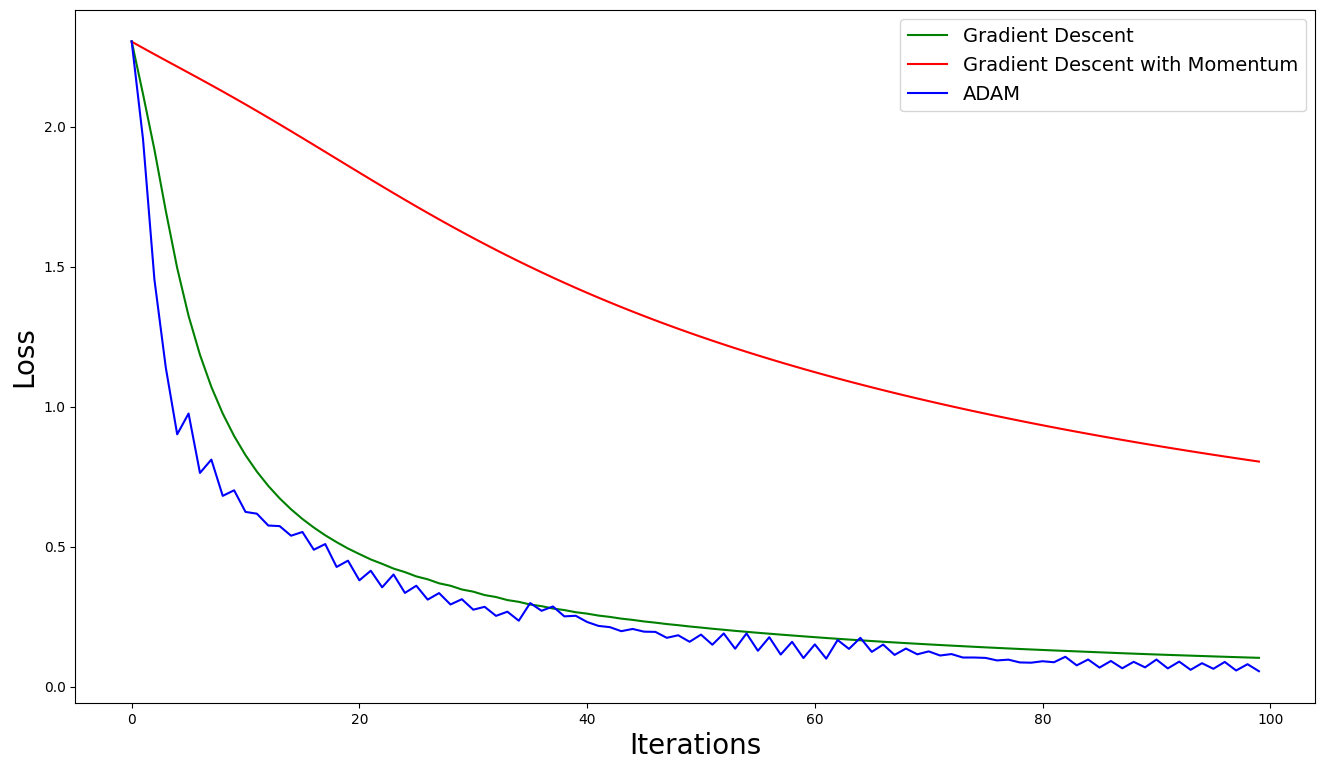

In [ ]:
t = np.arange(0,max_iter)
plt.subplots(figsize=(16,9))
plt.plot(t,Cost_list1,"g-",label="Gradient Descent")
plt.plot(t,Cost_list2,"r-",label="Gradient Descent with Momentum")
plt.plot(t,Cost_list3,"b-", label="ADAM")
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.legend(fontsize=14);
plt.show();

## Testing the Predicted Results Visually

### Testing the Results with ADAM Optimizer

Testing the Predictions with the Trained Data



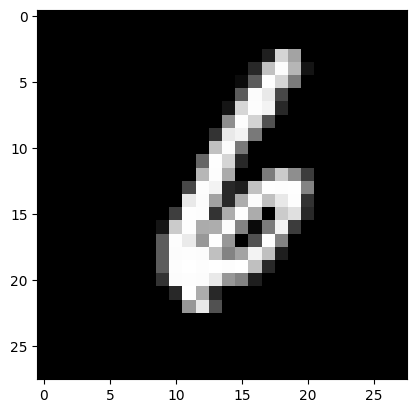

------------------------------------------------------------------------------------------ 

Our model says it is : 6 

------------------------------------------------------------------------------------------ 


Testing the Predictions with the Unseen Data



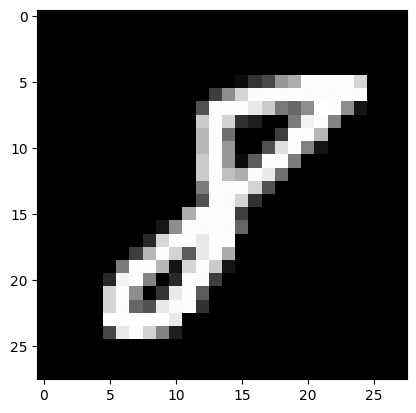

------------------------------------------------------------------------------------------ 

Our model says it is : 8 

------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 

Accuracy of Training Dataset with ADAM Optimizer:   96.5 %
Accuracy of Test Dataset with ADAM Optimizer:  81.14 %
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 



In [ ]:
##Testing Actual Results from the ADAM optimizer

print("Testing the Predictions with the Trained Data\n")
idx1 = int(random.randrange(0,X_train.shape[1]))
plt.imshow(X_train[:, idx1].reshape((28,28)),cmap='gray')
plt.show()
predicted1 = for_prop(X_train[:, idx1].reshape(X_train[:, idx1].shape[0], 1), Parameters3)
ypred1 = predicted1['a2']
ypred1 = np.argmax(ypred1, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred1[0], "\n")
print("---" * 30, "\n\n")


## Testing the data for Unseen Data
print("Testing the Predictions with the Unseen Data\n")
idx2 = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx2].reshape((28,28)),cmap='gray')
plt.show()

predicted2 = for_prop(X_test[:, idx2].reshape(X_test[:, idx2].shape[0], 1), Parameters3)
ypred2 = predicted2['a2']
ypred2 = np.argmax(ypred2, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred2[0], "\n")
print("---" * 30, "\n")


print("------" * 30, "\n")
print("Accuracy of Training Dataset with ADAM Optimizer:  ", accuracy(X_train, Y_train, Parameters3), "%")
print("Accuracy of Test Dataset with ADAM Optimizer: ", round(accuracy(X_test, Y_test, Parameters3), 2), "%")
print("------" * 30, "\n")

## Testing Actual Results from the Gradient Descent with Momentum

Testing the Predictions with the Trained Data



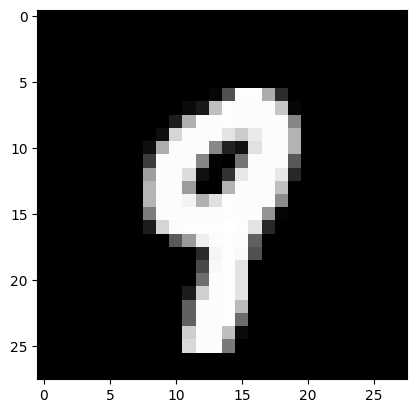

------------------------------------------------------------------------------------------ 

Our model says it is : 9 

------------------------------------------------------------------------------------------ 


Testing the Predictions with the Unseen Data



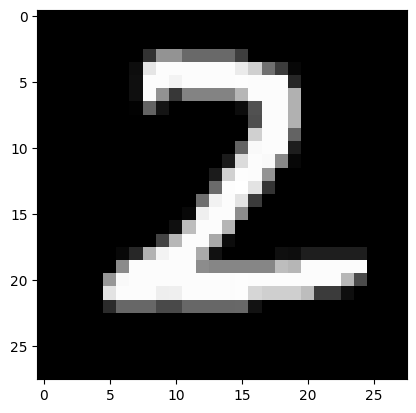

------------------------------------------------------------------------------------------ 

Our model says it is : 2 

------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 

Accuracy of Training Dataset with Gradient Descent with Momentum:   85.7 %
Accuracy of Test Dataset with Gradient Descent with Momentum:  80.86 %
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 



In [ ]:
##Testing Actual Results from the Gradient Descent with Momentum

print("Testing the Predictions with the Trained Data\n")
idx1 = int(random.randrange(0,X_train.shape[1]))
plt.imshow(X_train[:, idx1].reshape((28,28)),cmap='gray')
plt.show()
predicted1 = for_prop(X_train[:, idx1].reshape(X_train[:, idx1].shape[0], 1), Parameters2)
ypred1 = predicted1['a2']
ypred1 = np.argmax(ypred1, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred1[0], "\n")
print("---" * 30, "\n\n")


## Testing the data for Unseen Data
print("Testing the Predictions with the Unseen Data\n")
idx2 = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx2].reshape((28,28)),cmap='gray')
plt.show()

predicted2 = for_prop(X_test[:, idx2].reshape(X_test[:, idx2].shape[0], 1), Parameters2)
ypred2 = predicted2['a2']
ypred2 = np.argmax(ypred2, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred2[0], "\n")
print("---" * 30, "\n")


print("------" * 30, "\n")
print("Accuracy of Training Dataset with Gradient Descent with Momentum:  ", accuracy(X_train, Y_train, Parameters2), "%")
print("Accuracy of Test Dataset with Gradient Descent with Momentum: ", round(accuracy(X_test, Y_test, Parameters2), 2), "%")
print("------" * 30, "\n")

## Testing Actual Results from the Gradient Descent

Testing the Predictions with the Trained Data



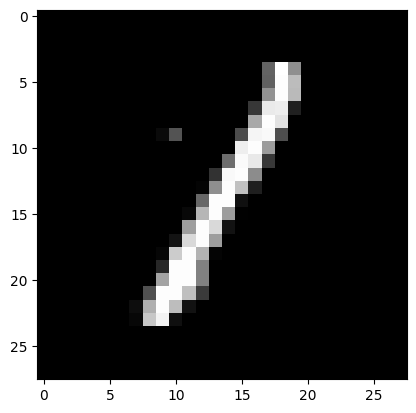

------------------------------------------------------------------------------------------ 

Our model says it is : 1 

------------------------------------------------------------------------------------------ 


Testing the Predictions with the Unseen Data



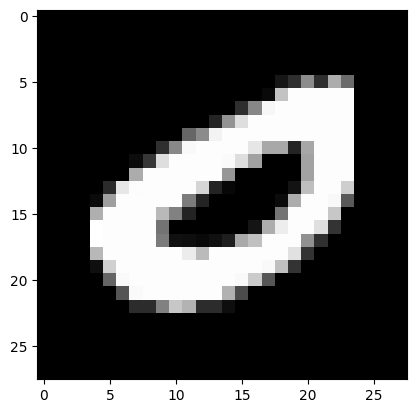

------------------------------------------------------------------------------------------ 

Our model says it is : 0 

------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 

Accuracy of Training Dataset with Gradient Descent:   99.0 %
Accuracy of Test Dataset with Gradient Descent:  86.86 %
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 



In [ ]:
##Testing Actual Results from the Gradient Descent

print("Testing the Predictions with the Trained Data\n")
idx1 = int(random.randrange(0,X_train.shape[1]))
plt.imshow(X_train[:, idx1].reshape((28,28)),cmap='gray')
plt.show()
predicted1 = for_prop(X_train[:, idx1].reshape(X_train[:, idx1].shape[0], 1), Parameters1)
ypred1 = predicted1['a2']
ypred1 = np.argmax(ypred1, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred1[0], "\n")
print("---" * 30, "\n\n")


## Testing the data for Unseen Data
print("Testing the Predictions with the Unseen Data\n")
idx2 = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx2].reshape((28,28)),cmap='gray')
plt.show()

predicted2 = for_prop(X_test[:, idx2].reshape(X_test[:, idx2].shape[0], 1), Parameters1)
ypred2 = predicted2['a2']
ypred2 = np.argmax(ypred2, 0)

print("---" * 30, "\n")
print("Our model says it is :", ypred2[0], "\n")
print("---" * 30, "\n")


print("------" * 30, "\n")
print("Accuracy of Training Dataset with Gradient Descent:  ", accuracy(X_train, Y_train, Parameters1), "%")
print("Accuracy of Test Dataset with Gradient Descent: ", round(accuracy(X_test, Y_test, Parameters1), 2), "%")
print("------" * 30, "\n")

# Using the Framework Keras

## Performance test using MNIST

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.2460 - accuracy: 0.9253 - val_loss: 0.1039 - val_accuracy: 0.9684
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0992 - accuracy: 0.9700 - val_loss: 0.0785 - val_accuracy: 0.9763
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0712 - accuracy: 0.9779 - val_loss: 0.0672 - val_accuracy: 0.9782
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0854 - val_accuracy: 0.9753
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0450 - accuracy: 0.9854 - val_loss: 0.0683 - val_accuracy: 0.9778
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0395 - accuracy: 0.9868 - val_loss: 0.0659 - val_accuracy: 0.9810
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.

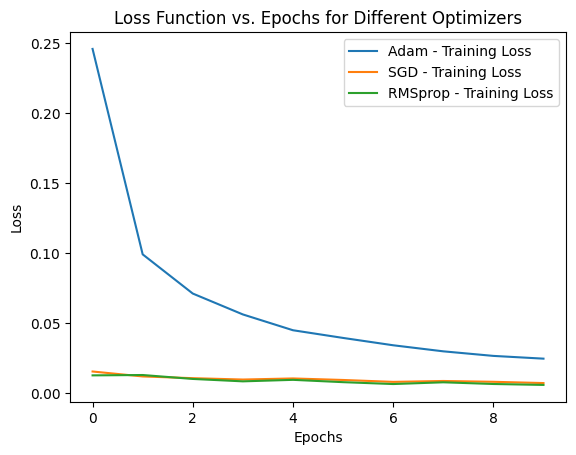

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam, SGD, RMSprop

# Loading MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the data to fit LSTM's input shape
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

# Normalizing the pixel data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Converting the label data from integers to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Creating a model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Testing performance of different optimizers
optimizers = {'Adam': Adam(), 'SGD': SGD(), 'RMSprop': RMSprop()}

start_time = time.time()
for optimizer_name in optimizers:
    model.compile(loss='categorical_crossentropy', optimizer=optimizers[optimizer_name], metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

    # Plotting the training and validation loss over epochs
    plt.plot(history.history['loss'], label=f'{optimizer_name} - Training Loss')
    # plt.plot(history.history['val_loss'], label=f'{optimizer_name} - Validation Loss')

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    print('Optimizer:', optimizer_name)
    print('Evaluation took:', str(round(time.time() - start_time, 2)), 'seconds')
    print('=' * 30)

##Plotting labels and legends
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs for Different Optimizers')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab\ Notebooks/Math\ 288/Minipaper/Simple\ Artificial\ Neural\ Network.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab Notebooks/Math 288/Minipaper/Simple Artificial Neural Network.ipynb to html
[NbConvertApp] Writing 930226 bytes to /content/drive/MyDrive/Colab Notebooks/Math 288/Minipaper/Simple Artificial Neural Network.html
